<a href="https://colab.research.google.com/github/varadhye12/data-prediction/blob/main/AIRBNB_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/Airbnb_Open_Data.csv')

<ipython-input-7-6cc90d526c8d>:1: DtypeWarning: Columns (11,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Airbnb_Open_Data.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65815 entries, 0 to 65814
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65815 non-null  int64  
 1   NAME                            65612 non-null  object 
 2   host id                         65815 non-null  int64  
 3   host_identity_verified          65598 non-null  object 
 4   host name                       65538 non-null  object 
 5   neighbourhood group             65786 non-null  object 
 6   neighbourhood                   65799 non-null  object 
 7   lat                             65807 non-null  float64
 8   long                            65807 non-null  float64
 9   country                         65492 non-null  object 
 10  country code                    65729 non-null  object 
 11  instant_bookable                65729 non-null  object 
 12  cancellation_policy             

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.dtypes

,0
id,int64
NAME,object
host id,int64
host_identity_verified,object
host name,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object


In [ ]:
df.shape

(65815, 26)

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(65815, 26)

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
id,0
NAME,203
host id,0
host_identity_verified,217
host name,277
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,323


In [ ]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,6.581500e+04,6.581500e+04,65807.000000,65807.000000,65624.000000,65451.000000,65663.000000,55121.000000,65582.000000,65670.000000,65376.000000
mean,1.917587e+07,4.934098e+10,40.728086,-73.949290,2012.488571,8.137996,27.770160,1.430027,3.314477,8.897868,156.256929
std,1.049331e+07,2.854065e+10,0.055898,0.050277,5.760941,34.906587,52.128887,1.818019,1.263721,34.687120,134.420776
min,1.001254e+06,1.303496e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.008860e+07,2.465398e+10,40.688600,-73.982910,2008.000000,1.000000,1.000000,0.250000,2.000000,1.000000,22.000000
50%,1.917587e+07,4.920176e+10,40.722610,-73.954550,2012.000000,3.000000,7.000000,0.820000,3.000000,1.000000,133.000000
75%,2.826314e+07,7.413036e+10,40.762765,-73.931745,2017.000000,5.000000,29.000000,2.070000,4.000000,3.000000,285.000000
max,3.735041e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,426.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65815 entries, 0 to 65814
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65815 non-null  int64  
 1   NAME                            65612 non-null  object 
 2   host id                         65815 non-null  int64  
 3   host_identity_verified          65598 non-null  object 
 4   host name                       65538 non-null  object 
 5   neighbourhood group             65786 non-null  object 
 6   neighbourhood                   65799 non-null  object 
 7   lat                             65807 non-null  float64
 8   long                            65807 non-null  float64
 9   country                         65492 non-null  object 
 10  country code                    65729 non-null  object 
 11  instant_bookable                65729 non-null  object 
 12  cancellation_policy             

In [ ]:
#Handling Missing Data#
#identifying the extent of missingness,
#choosing an appropriate imputation method (like mean, median, mode, or advanced techniques), and potentially using missing indicator variables
columns_to_drop = ['id', 'host id', 'host name', 'license', 'last review', 'NAME','service fee']
data_cleaned = df.drop(columns=columns_to_drop)

In [ ]:
# For columns with numerical data, we can consider filling missing values with the median or mean
numerical_columns = ['Construction year', 'minimum nights', 'number of reviews',
                     'reviews per month', 'review rate number', 'calculated host listings count',
                     'availability 365']
for col in numerical_columns:
    data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

<ipython-input-18-68899b450cdc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)


In [ ]:
# For categorical columns, we can consider filling missing values with the mode
categorical_columns = ['host_identity_verified', 'neighbourhood group', 'neighbourhood',
                       'country', 'country code', 'instant_bookable', 'cancellation_policy',
                       'room type', 'house_rules']
for col in categorical_columns:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

<ipython-input-20-f3a998df4fa9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)
<ipython-input-20-f3a998df4fa9>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)


In [ ]:
# Removing rows with missing 'price'
data_cleaned = data_cleaned.dropna(subset=['price'])

In [ ]:
#we need to convert 'price' to numerical values
# Removing the dollar sign and converting to float
data_cleaned['price'] = data_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
# Interpolating 'lat' and 'long' based on 'neighbourhood'
# Grouping by 'neighbourhood' and calculating the mean 'lat' and 'long'
mean_coords = data_cleaned.groupby('neighbourhood')[['lat', 'long']].mean()

# Applying the mean coordinates to missing values
data_cleaned = data_cleaned.set_index('neighbourhood')
data_cleaned['lat'].fillna(mean_coords['lat'], inplace=True)
data_cleaned['long'].fillna(mean_coords['long'], inplace=True)
data_cleaned.reset_index(inplace=True)

<ipython-input-22-5b92331a5571>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['lat'].fillna(mean_coords['lat'], inplace=True)
<ipython-input-22-5b92331a5571>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
# Checking the dataset after handling missing values
data_cleaned.isnull().sum(), data_cleaned.shape

(neighbourhood                     0
 host_identity_verified            0
 neighbourhood group               0
 lat                               0
 long                              0
 country                           0
 country code                      0
 instant_bookable                  0
 cancellation_policy               0
 room type                         0
 Construction year                 0
 price                             0
 minimum nights                    0
 number of reviews                 0
 reviews per month                 0
 review rate number                0
 calculated host listings count    0
 availability 365                  0
 house_rules                       0
 dtype: int64,
 (65650, 19))

In [ ]:
#Exploratory Data Analysis(EDA)
#a crucial approach in data analysis that uses statistical graphics and other visualization methods to summarize and understand the main characteristics of a dataset,
# often helping to identify patterns, outliers, and unexpected features

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Setting up the aesthetics for the plots
sns.set(style="whitegrid")

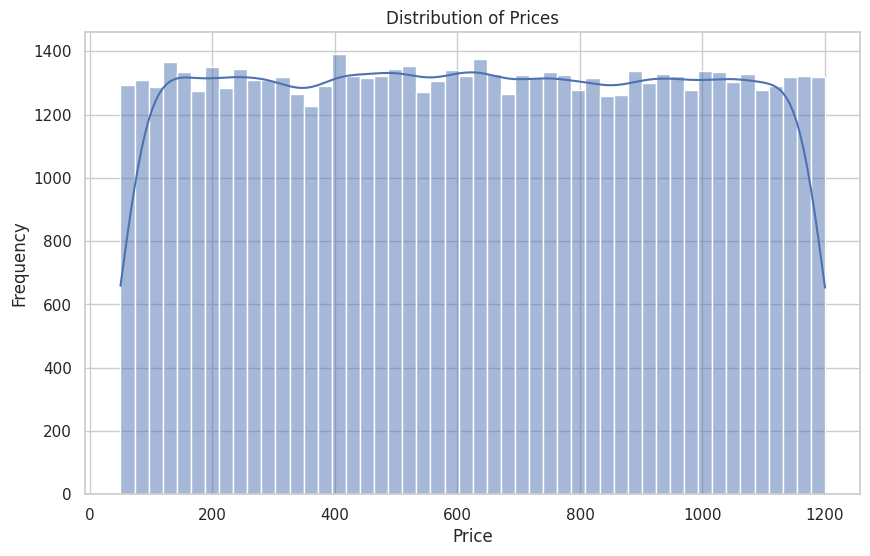

In [ ]:
# Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['price'], kde=True, bins=50)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

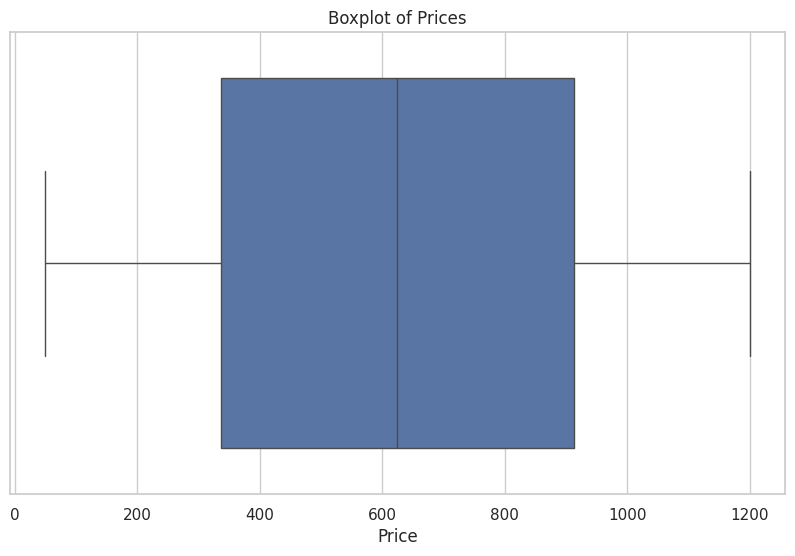

In [ ]:
# Boxplot for Prices (to identify outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

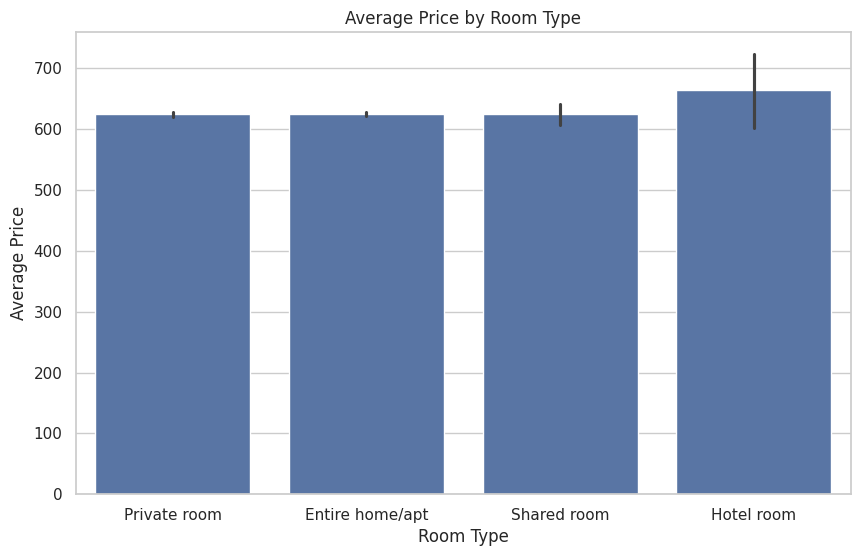

In [ ]:
# Room Type vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='room type', y='price', data=data_cleaned)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

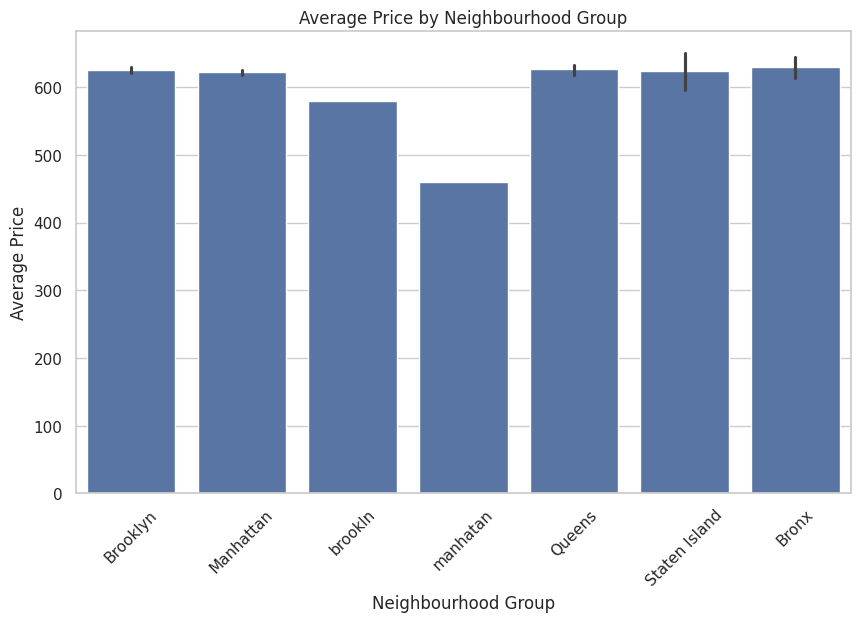

In [ ]:
# Neighbourhood Group vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood group', y='price', data=data_cleaned)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Summary Statistics
summary_statistics = data_cleaned.describe()
summary_statistics

,lat,long,Construction year,price,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,65650.000000,65650.000000,65650.000000,65650.000000,65650.000000,65650.000000,65650.000000,65650.000000,65650.000000,65650.000000
mean,40.728077,-73.949307,2012.487113,624.241478,8.101112,27.718309,1.331565,3.313694,8.876207,156.065438
std,0.055910,0.050276,5.752529,331.778687,34.816457,52.085187,1.679867,1.261241,34.651148,133.972456
min,40.499790,-74.249840,2003.000000,50.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,40.688590,-73.982908,2008.000000,337.000000,1.000000,1.000000,0.320000,2.000000,1.000000,23.000000
50%,40.722605,-73.954550,2012.000000,624.000000,3.000000,7.000000,0.820000,3.000000,1.000000,133.000000
75%,40.762768,-73.931762,2017.000000,912.000000,5.000000,29.000000,1.780000,4.000000,3.000000,283.000000
max,40.916970,-73.705220,2022.000000,1200.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,426.000000
